# BGC overview

In [17]:
import os
import pandas as pd
import sqlite3
import yaml
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Extract tables from SQL database and save as CSV

The SQL database from bigslice rule was processed to generate dataframes below. This step is required only one time.

In [18]:
with open("config.yaml", "r") as f:
    notebook_configuration = yaml.safe_load(f)
notebook_configuration

{'bgcflow_dir': '/datadrive/bgcflow'}

In [25]:
# Write samples.csv table to config directory of qc_strepto_ncbi project
bgcflow_dir = Path(notebook_configuration["bgcflow_dir"])
project_name_1 = "mq_strepto"
processed_dir_1 = bgcflow_dir / "data" / "processed" / project_name_1

# Read output tables from the processed directory
ncbi_meta_table = processed_dir_1 / "tables"/ "df_ncbi_meta.csv"
df_ncbi_meta = pd.read_csv(ncbi_meta_table, index_col= 0)

gtdb_meta_table = processed_dir_1 / "tables"/ "df_gtdb_meta_curated.csv"
df_gtdb_meta = pd.read_csv(gtdb_meta_table, index_col= 0)

seqfu_meta_table = processed_dir_1 / "tables"/ "df_seqfu_stats.csv"
df_seqfu_meta = pd.read_csv(seqfu_meta_table, index_col= 0)

mash_table = processed_dir_1 / "mash"/ "df_mash.csv"
df_mash = pd.read_csv(mash_table, index_col= 0)

df_phylogroups = pd.read_csv("assets/tables/df_clusters.csv", index_col=0)

filters_table = processed_dir_1 / "tables" / "df_filters.csv"
df_filters = pd.read_csv(filters_table, index_col=0)

antismash_summary_table = processed_dir_1 / "tables" / "df_antismash_7.0.0_summary.csv"
df_antismash_summary = pd.read_csv(antismash_summary_table, index_col=0, low_memory=False)

bgcs_summary_table = processed_dir_1 / "tables" / "df_regions_antismash_7.0.0.csv"
df_bgcs_antismash = pd.read_csv(bgcs_summary_table, index_col=0)

arts_table = processed_dir_1 / "tables" / "df_arts_as-7.0.0.csv"
df_arts = pd.read_csv(arts_table, index_col=0)

# Plot BGC distribution

In [40]:
df = df_filters[df_filters.genus == "Streptomyces"]
df = df[df.quality.isin(["MQ", "HQ"])]
df["Cluster"] = df_phylogroups.Cluster_label
df.Cluster = df.Cluster.fillna("NA")
df.loc[df_phylogroups.index, "Cluster_Color"] = df_phylogroups.loc[df_phylogroups.index, "Cluster_Color"]
df["GC_content"] = df["gc"] * 100
df = pd.concat([df, df_antismash_summary[["bgcs_count", "bgcs_on_contig_edge", 
                "protoclusters_count", "cand_clusters_count"]]], axis=1)

In [41]:
df

,genome_id.1,genus,source,species,quality,completeness,contamination,N50,contigs,genome_len,gc,Cluster,Cluster_Color,GC_content,bgcs_count,bgcs_on_contig_edge,protoclusters_count,cand_clusters_count
genome_id,,,,,,,,,,,,,,,,,,
GCF_000009765.2,GCF_000009765.2,Streptomyces,NCBI,avermitilis,HQ,99.890000,0.790000,9025608,2,9119895,0.707014,P2,#3cb44b,70.701351,35.0,0.0,0.0,0.0
GCF_000010605.1,GCF_000010605.1,Streptomyces,NCBI,griseus,HQ,99.840000,0.000000,8545929,1,8545929,0.722274,P3,#ffe119,72.227408,37.0,0.0,0.0,0.0
GCF_000091305.1,GCF_000091305.1,Streptomyces,NCBI,scabiei,HQ,100.000000,0.000000,10148695,1,10148695,0.714528,P2,#3cb44b,71.452832,33.0,0.0,0.0,0.0
GCF_000092385.1,GCF_000092385.1,Streptomyces,NCBI,milbemycinicus,HQ,99.740000,1.960000,11936683,1,11936683,0.707546,NA,#808080,70.754589,50.0,1.0,0.0,0.0
GCF_000147815.2,GCF_000147815.2,Streptomyces,NCBI,violaceusniger_A,HQ,100.000000,1.050000,10657107,3,11138313,0.708764,NA,#808080,70.876362,47.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NBC_01798,NBC_01798,Streptomyces,NBC,microflavus,MQ,99.911032,0.457550,8068458,1,8068458,0.713899,P3,#ffe119,71.389862,30.0,0.0,0.0,0.0
NBC_01799,NBC_01799,Streptomyces,NBC,sp.,MQ,100.000000,2.075919,10049894,1,10049894,0.694367,P3,#ffe119,69.436742,20.0,0.0,0.0,0.0
NBC_01800,NBC_01800,Streptomyces,NBC,sp.,MQ,100.000000,2.313167,10117522,1,10117522,0.694073,P3,#ffe119,69.407252,20.0,0.0,0.0,0.0


In [43]:
cluster_color_dict = {"NA":'#808080',
 "P1": '#e6194b',
 "P2": '#3cb44b',
 "P3": '#ffe119',
 "P4": '#0082c8',
 "P5": '#f58231',
 "P6": '#911eb4',
 "P7": '#46f0f0'
        }

In [44]:
df.sort_values(by="Cluster", inplace=True)

In [45]:
# # Create the boxenplot using the filtered data
# plt.figure(figsize=(10, 6))
# sns.boxenplot(x='Cluster', y='bgcs_count', data=df, color="lightgrey")
# sns.stripplot(x='Cluster', y='bgcs_count', data=df, size=4, hue='Cluster', palette=cluster_color_dict)
# plt.text(4, 60, f'Total BGCs: {int(df.bgcs_count.sum())} across {df.shape[0]} genomes', color='black', ha='left', va='center')
# plt.text(4, 55, f'BGCs on contig edge: {int(df.bgcs_on_contig_edge.sum())}', color='black', ha='left', va='center')

# plt.title('Number of BGCs across genomes', fontdict={"size": 20})
# plt.xlabel('Phylogroup')
# plt.ylabel('BGCs per genome')
# plt.legend(title='Phylogroup')

# # Show the plot
# plt.savefig("assets/figures/Figure_11/bgc_count.png", bbox_inches="tight")
# plt.savefig("assets/figures/Figure_11/bgc_count.svg", bbox_inches="tight")
# plt.show()

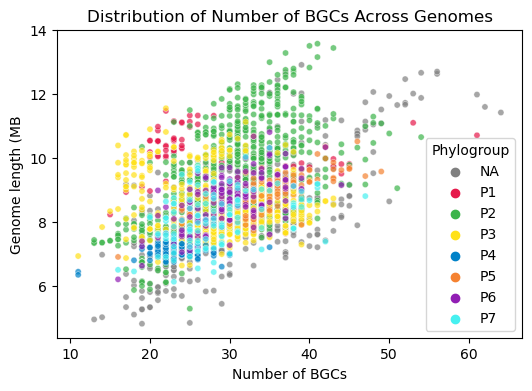

In [47]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bgcs_count', y='genome_len', hue='Cluster', data=df, palette=cluster_color_dict,
               alpha=0.7, s=20)
# scatter_plot = sns.scatterplot(x='bgcs_on_contig_edge', y='contigs', hue='quality', 
#                                data=df, alpha=0.7, s=20)
plt.title('Distribution of Number of BGCs Across Genomes')
plt.ylabel('Genome length (MB')
plt.xlabel('Number of BGCs')
plt.legend(title='Phylogroup')

# Define the formatter function
def millions(x, pos):
    return '%1.0f' % (x * 1e-6)

formatter = ticker.FuncFormatter(millions)

# Set the formatter for the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.savefig("assets/figures/Figure_11/bgc_genome_len.png", bbox_inches="tight")
plt.savefig("assets/figures/Figure_11/bgc_genome_len.svg", bbox_inches="tight")

plt.show()

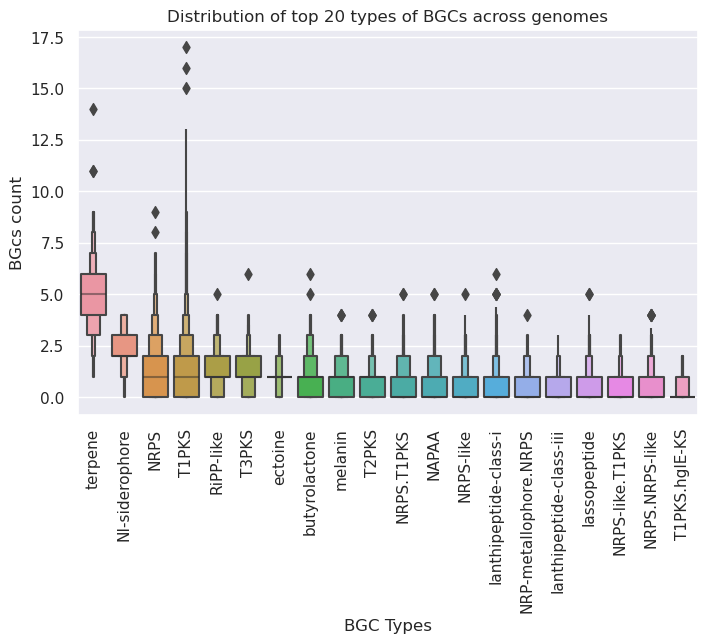

In [48]:
top20_bgc_categories = df_antismash_summary.iloc[:,10:].fillna(0).sum(0).sort_values(ascending=False)[:20]
df_top_bgcs = df_antismash_summary[top20_bgc_categories.index]
df_top_bgcs = df_top_bgcs.fillna(0)

sns.set(font_scale=1)

df_melted = df_top_bgcs.melt(value_vars=df_top_bgcs.columns, var_name='BGC Type', value_name='Count')

plt.figure(figsize=(8, 5))
sns.boxenplot(x='BGC Type', y='Count', data=df_melted)

plt.title('Distribution of top 20 types of BGCs across genomes')
plt.xlabel('BGC Types')
plt.ylabel('BGcs count')
plt.xticks(rotation=90)

# Show the plot
plt.savefig("assets/figures/Figure_11/top20_bgc_types.png", bbox_inches="tight")
plt.savefig("assets/figures/Figure_11/top20_bgc_types.svg", bbox_inches="tight")

plt.show()

In [49]:
df_bgcs_antismash_known = df_bgcs_antismash[df_bgcs_antismash.similarity > 0.8]
replace_known_dict = {"desferrioxamin B/desferrioxamine E": "desferrioxamine BE",
                     "desferrioxamin B": "desferrioxamine B",
                     "desferrioxamin E": "desferrioxamine E",
                      "desferrioxamine": "desferrioxamine",
                      "legonoxamine A/desferrioxamine B/legonoxamine B": "desferrioxamine B",
                     "flaviolin/1,3,6,8-tetrahydroxynaphthalene": "flaviolin",
                     "SGR PTMs/SGR PTM Compound b/SGR PTM Compound c/SGR PTM Compound d": "SGR PTMs",
                      "10-epi-HSAF/10-epi-3-deOH-HSAF/10-epi-maltophilin/10-epi-xanthobaccin C/10-epi-hydroxymaltophilin/10-epi-FI-2": "10-epi-HSAF",
                     }

known_bgcs = [replace_known_dict[cluster] if cluster in replace_known_dict.keys() else cluster for cluster in df_bgcs_antismash_known.most_similar_known_cluster_description.value_counts().index]
df_known_presence = pd.DataFrame(0, index=df.index, columns=known_bgcs)

# Iterate through the DataFrame and update the presence_matrix
for bgc_id in df_bgcs_antismash_known.index:
    known_cluster = df_bgcs_antismash_known.loc[bgc_id, 'most_similar_known_cluster_description']
    genome_id = df_bgcs_antismash_known.loc[bgc_id, 'genome_id']
    
    if known_cluster in replace_known_dict.keys():
        known_cluster = replace_known_dict[known_cluster]

    df_known_presence.loc[genome_id, known_cluster] = 1

<Figure size 1000x1000 with 0 Axes>

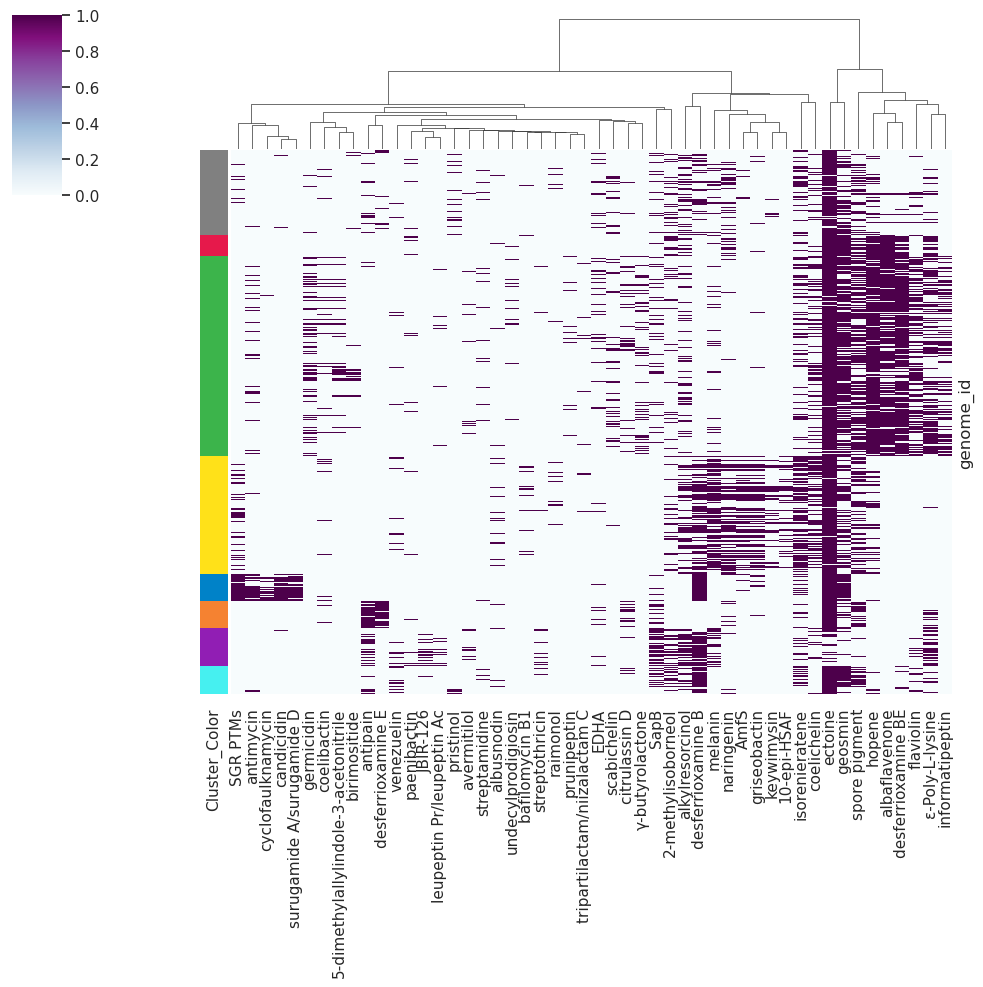

In [50]:
df_known_presence_top = df_known_presence.iloc[:, :50]
row_colors = df['Cluster_Color']
    
plt.figure(figsize=(10,10))
sns.clustermap(df_known_presence_top, 
                   metric="euclidean", method="ward", cmap="BuPu",
                   row_colors=row_colors, row_cluster=False,
                   xticklabels=True, yticklabels=False )
plt.show()

<Figure size 1000x1000 with 0 Axes>

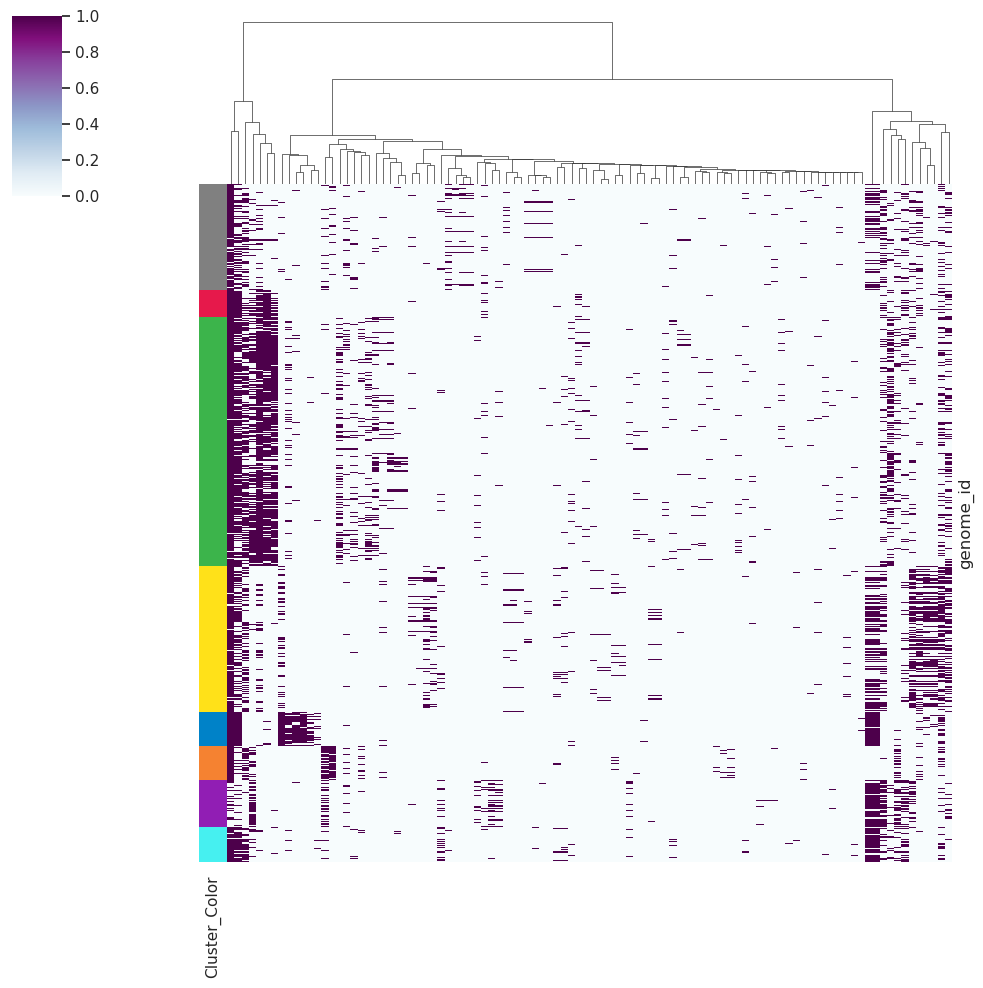

In [51]:
df_known_presence_top = df_known_presence.iloc[:, :100]
row_colors = df['Cluster_Color']
    
plt.figure(figsize=(10,10))
sns.clustermap(df_known_presence_top, 
                   metric="euclidean", method="ward", cmap="BuPu",
                   row_colors=row_colors, row_cluster=False,
                   xticklabels=False, yticklabels=False )
plt.show()

In [18]:
# Read bigslice results
gcf_membership_table = processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcf_membership.csv"
df_gcf_membership = pd.read_csv(gcf_membership_table, index_col=0)

bigslice_gcfs_table = processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_gcfs.csv"
df_gcfs_bigslice = pd.read_csv(bigslice_gcfs_table, index_col=0)

bigslice_bgcs_table = processed_dir_1 / "bigslice" / "cluster_as_7.0.0" / "df_bgcs.csv"
df_bgcs_bigslice = pd.read_csv(bigslice_bgcs_table, index_col=0)

In [19]:
for idx in df_bgcs_bigslice.index:
    genome_id = df_bgcs_bigslice.loc[idx, "orig_folder"]
    bgc_file = df_bgcs_bigslice.loc[idx, "orig_filename"]
    bgc_id = bgc_file[:-4]
    if bgc_id in df_bgcs_antismash.index:
        df_bgcs_bigslice.loc[idx, "bgc_id"] = bgc_id
    else:
        print(bgc_file)
    df_bgcs_bigslice.loc[idx, "genome_id"] = genome_id

df_bgcs_bigslice = df_bgcs_bigslice.set_index("id")

In [20]:
for idx in df_gcf_membership.index:
    bgc_id = df_gcf_membership.loc[idx, "bgc_id"]
    gcf_id = df_gcf_membership.loc[idx, "gcf_id"]
    membership_value = df_gcf_membership.loc[idx, "membership_value"]

    df_bgcs_bigslice.loc[bgc_id, "gcf_id"] = str(gcf_id)
    df_bgcs_bigslice.loc[bgc_id, "membership_value"] = membership_value
df_bgcs_bigslice = df_bgcs_bigslice.set_index("bgc_id")

In [21]:
df_gcfs_bigslice["count"] = df_gcf_membership.gcf_id.value_counts()
df_gcfs_bigslice = df_gcfs_bigslice.sort_values(by="count", ascending=False)

In [22]:
df_gcfs_bigslice_large = df_gcfs_bigslice[df_gcfs_bigslice["count"] >= 10]

In [23]:
df_gcf_presence = pd.DataFrame(0, index=df_mash_cluster.index, columns=df_gcfs_bigslice.index)
for gcf_id in df_gcf_presence.columns:
    genome_list = df_bgcs_bigslice[df_bgcs_bigslice.gcf_id == str(gcf_id)].genome_id.tolist()
    for genome_id in genome_list:
        if genome_id in df_gcf_presence.index:
            df_gcf_presence.loc[genome_id, gcf_id] = df_gcf_presence.loc[genome_id, gcf_id] + 1

In [24]:
df_subcluster = pd.read_csv("assets/tables/df_subclusters_reduced.csv", index_col=0)

# 